In [1]:
# Importing required libraries
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Importing Dataset 1
global_indicator = pd.read_csv('Indicators_of_Anxiety_or_Depression.csv')

In [3]:
# Inspecting the number of rows and columns
global_indicator.shape

(16092, 14)

In [4]:
# Getting an overview of each column
global_indicator.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16092 entries, 0 to 16091
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Indicator               16092 non-null  object 
 1   Group                   16092 non-null  object 
 2   State                   16092 non-null  object 
 3   Subgroup                16092 non-null  object 
 4   Phase                   16092 non-null  object 
 5   Time Period             16092 non-null  int64  
 6   Time Period Label       16092 non-null  object 
 7   Time Period Start Date  16092 non-null  object 
 8   Time Period End Date    16092 non-null  object 
 9   Value                   15386 non-null  float64
 10  Low CI                  15386 non-null  float64
 11  High CI                 15386 non-null  float64
 12  Confidence Interval     15386 non-null  object 
 13  Quartile Range          10558 non-null  object 
dtypes: float64(3), int64(1), object(10)
me

In [5]:
# Viewing the first five rows
global_indicator.head() # Getting an overview of the dataset

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,23.5,22.7,24.3,22.7 - 24.3,NaN
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,25.7,24.1,27.3,24.1 - 27.3,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,24.8,23.3,26.2,23.3 - 26.2,NaN
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,23.2,21.5,25.0,21.5 - 25.0,NaN


In [6]:
# Since we are looking at a national estimate, we don't need a state wise classification
# Hence dropping the columns group, state, phase, time period label and quartile range 
global_indicator_filtered = global_indicator[['Indicator','Group','Subgroup','Phase','Time Period Label','Value','Low CI', 'High CI','Confidence Interval']]
global_indicator_filtered.head()

,Indicator,Group,Subgroup,Phase,Time Period Label,Value,Low CI,High CI,Confidence Interval
0,Symptoms of Depressive Disorder,National Estimate,United States,1.0,"Apr 23 - May 5, 2020",23.5,22.7,24.3,22.7 - 24.3
1,Symptoms of Depressive Disorder,By Age,18 - 29 years,1.0,"Apr 23 - May 5, 2020",32.7,30.2,35.2,30.2 - 35.2
2,Symptoms of Depressive Disorder,By Age,30 - 39 years,1.0,"Apr 23 - May 5, 2020",25.7,24.1,27.3,24.1 - 27.3
3,Symptoms of Depressive Disorder,By Age,40 - 49 years,1.0,"Apr 23 - May 5, 2020",24.8,23.3,26.2,23.3 - 26.2
4,Symptoms of Depressive Disorder,By Age,50 - 59 years,1.0,"Apr 23 - May 5, 2020",23.2,21.5,25.0,21.5 - 25.0


In [7]:
# Identifying the unique groups 
global_indicator_filtered['Group'].unique()

array(['National Estimate', 'By Age', 'By Sex',
       'By Race/Hispanic ethnicity', 'By Education', 'By State',
       'By Disability status', 'By Gender identity',
       'By Sexual orientation'], dtype=object)

In [8]:
# The groups have been filtered based on age, sex, race, education, state, disability status, gender identity, sexual orientation
# Removing the 'by-state' group since we only require an average indicator in this case
global_indicator_filtered = global_indicator_filtered[global_indicator_filtered['Group'] != 'By State']
global_indicator_filtered = global_indicator_filtered[global_indicator_filtered['Group'] != 'National Estimate'] 
global_indicator_filtered

,Indicator,Group,Subgroup,Phase,Time Period Label,Value,Low CI,High CI,Confidence Interval
1,Symptoms of Depressive Disorder,By Age,18 - 29 years,1.0,"Apr 23 - May 5, 2020",32.7,30.2,35.2,30.2 - 35.2
2,Symptoms of Depressive Disorder,By Age,30 - 39 years,1.0,"Apr 23 - May 5, 2020",25.7,24.1,27.3,24.1 - 27.3
3,Symptoms of Depressive Disorder,By Age,40 - 49 years,1.0,"Apr 23 - May 5, 2020",24.8,23.3,26.2,23.3 - 26.2
4,Symptoms of Depressive Disorder,By Age,50 - 59 years,1.0,"Apr 23 - May 5, 2020",23.2,21.5,25.0,21.5 - 25.0
5,Symptoms of Depressive Disorder,By Age,60 - 69 years,1.0,"Apr 23 - May 5, 2020",18.4,17.0,19.7,17.0 - 19.7
...,...,...,...,...,...,...,...,...,...
16036,Symptoms of Anxiety Disorder or Depressive Dis...,By Education,High school diploma or GED,4.1,"May 28 - Jun 24, 2024",22.2,21.2,23.4,21.2 - 23.4
16037,Symptoms of Anxiety Disorder or Depressive Dis...,By Education,Some college/Associate's degree,4.1,"May 28 - Jun 24, 2024",23.6,22.6,24.5,22.6 - 24.5
16038,Symptoms of Anxiety Disorder or Depressive Dis...,By Education,Bachelor's degree or higher,4.1,"May 28 - Jun 24, 2024",15.3,14.7,16.0,14.7 - 16.0
16039,Symptoms of Anxiety Disorder or Depressive Dis...,By Disability status,With disability,4.1,"May 28 - Jun 24, 2024",49.2,47.2,51.3,47.2 - 51.3


In [9]:
global_indicator_filtered['Group'].unique()

array(['By Age', 'By Sex', 'By Race/Hispanic ethnicity', 'By Education',
       'By Disability status', 'By Gender identity',
       'By Sexual orientation'], dtype=object)

In [10]:
rename_map = {
    'Symptoms of Anxiety Disorder': 'Anxiety',
    'Symptoms of Depressive Disorder': 'Depression',
    'Symptoms of Anxiety Disorder or Depressive Disorder': 'Anxiety/Depression'
}
global_indicator_filtered['Indicator'] = global_indicator_filtered['Indicator'].replace(rename_map)


In [11]:
global_indicator_filtered['Subgroup'].unique()

array(['18 - 29 years', '30 - 39 years', '40 - 49 years', '50 - 59 years',
       '60 - 69 years', '70 - 79 years', '80 years and above', 'Male',
       'Female', 'Hispanic or Latino', 'Non-Hispanic White, single race',
       'Non-Hispanic Black, single race',
       'Non-Hispanic Asian, single race',
       'Non-Hispanic, other races and multiple races',
       'Less than a high school diploma', 'High school diploma or GED',
       "Some college/Associate's degree", "Bachelor's degree or higher",
       'With disability', 'Without disability', 'Cis-gender male',
       'Cis-gender female', 'Transgender', 'Gay or lesbian', 'Straight',
       'Bisexual'], dtype=object)

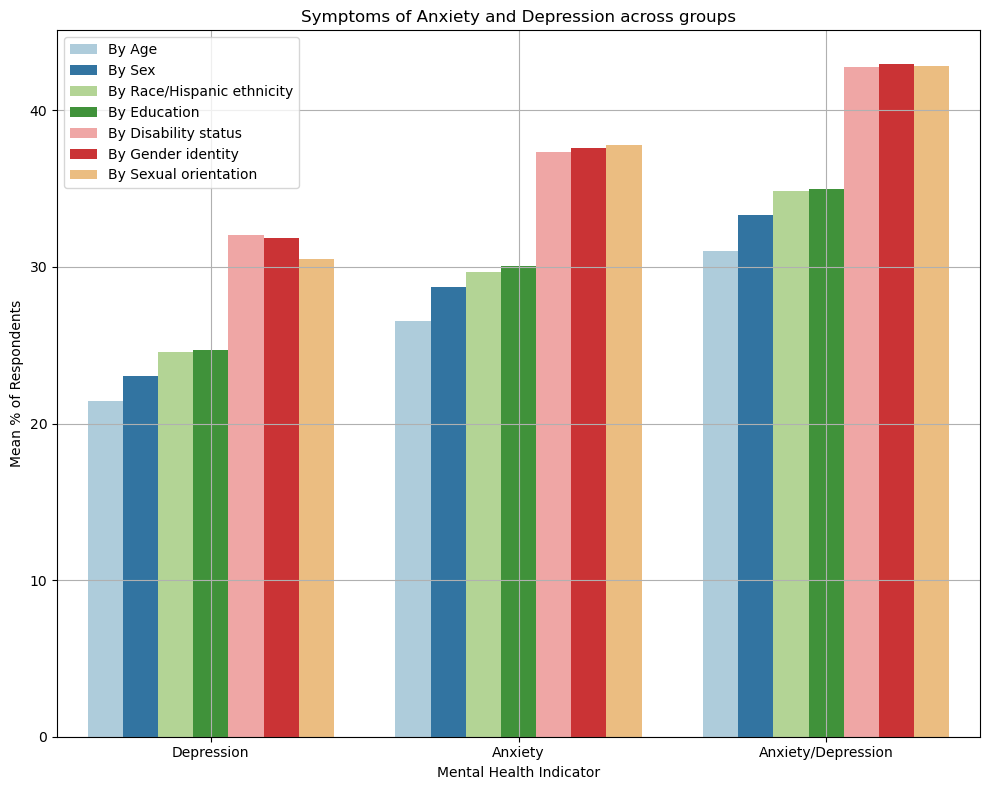

In [12]:
plt.figure(figsize=(10,8))
sns.barplot(data=global_indicator_filtered, x='Indicator', y='Value', hue='Group',palette = 'Paired',errorbar = None)
plt.title("Symptoms of Anxiety and Depression across groups")
plt.ylabel("Mean % of Respondents")
plt.xlabel("Mental Health Indicator")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

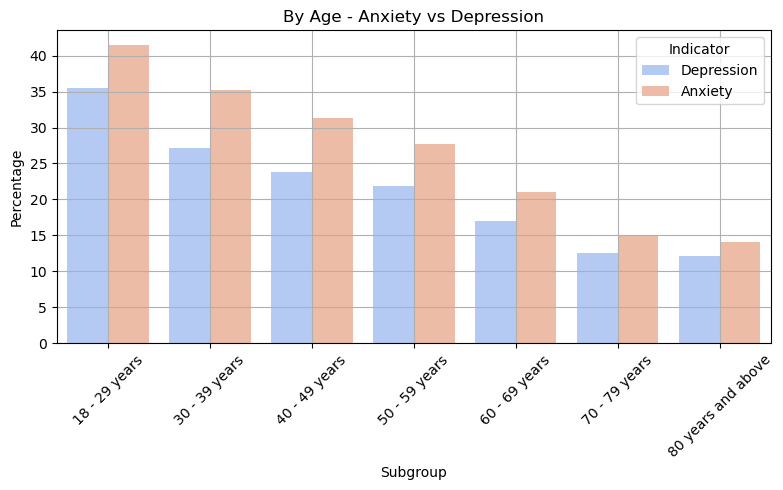

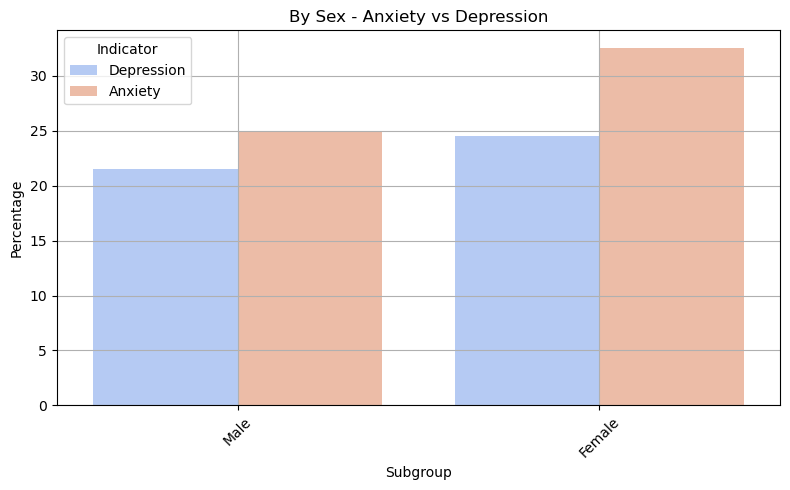

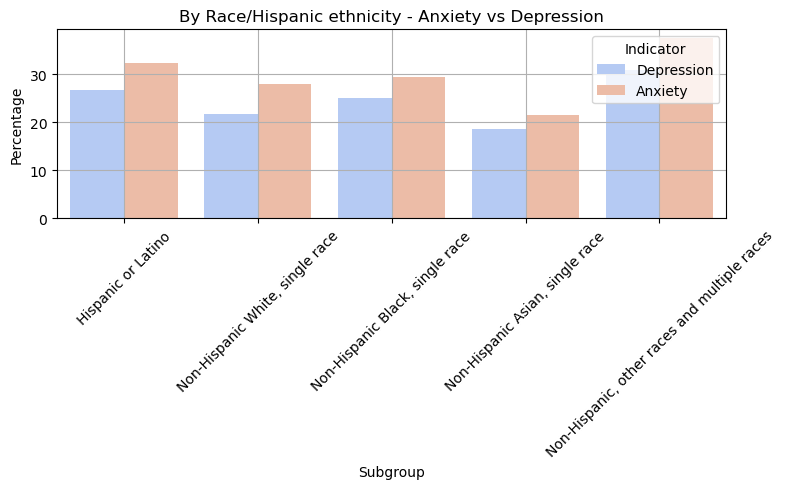

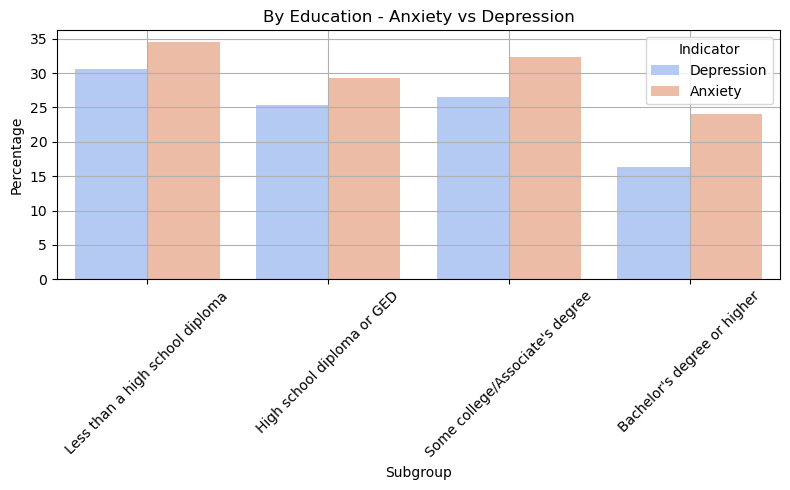

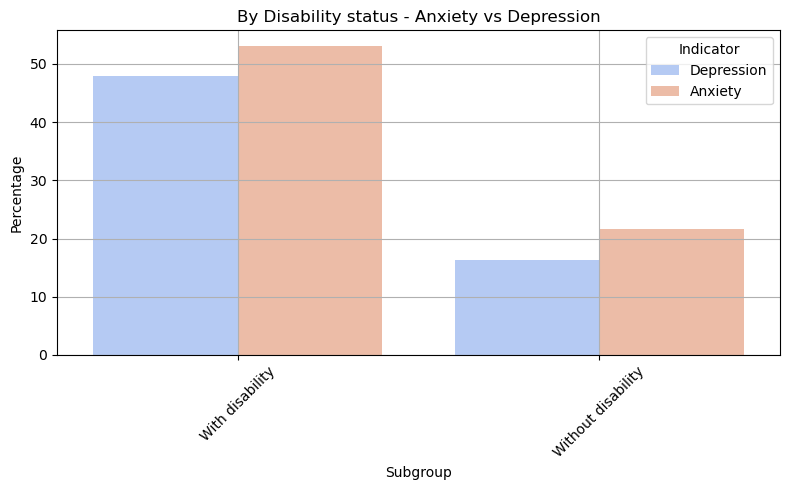

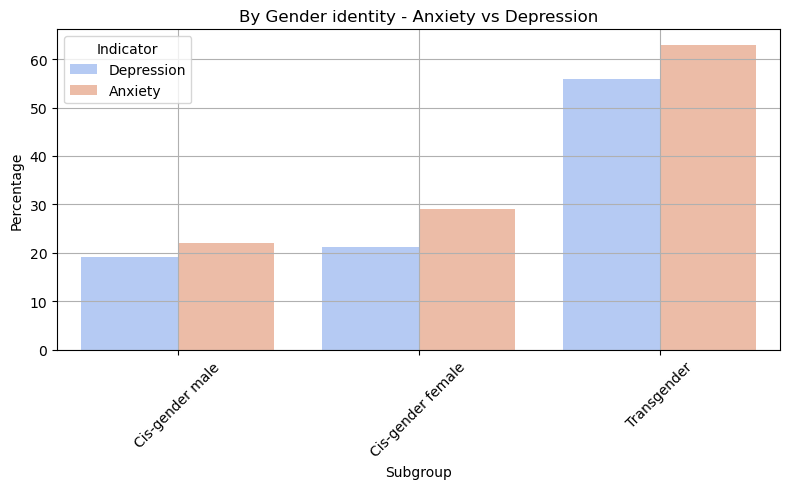

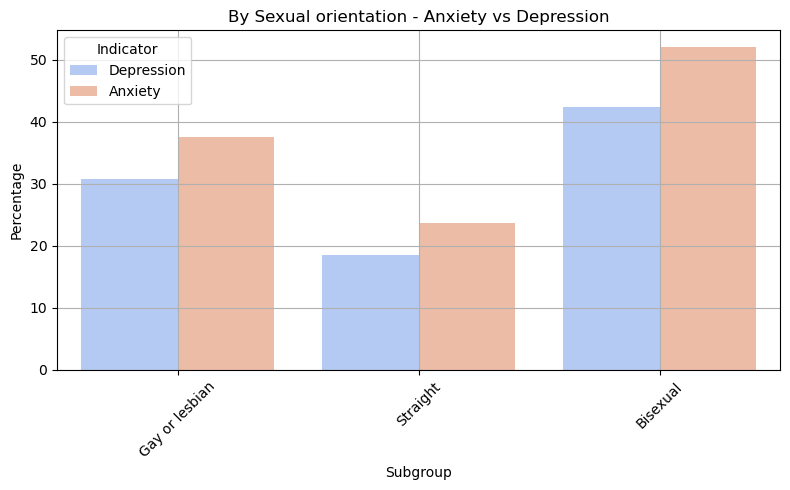

In [13]:
groups = global_indicator_filtered['Group'].unique()

# Loop through and plot
for g in groups:
    df_group = global_indicator_filtered[global_indicator_filtered['Group'] == g]
    df_group = df_group[df_group['Indicator'].isin([
        'Anxiety',
        'Depression'
    ])]
    pivot_df = (df_group.groupby(['Subgroup','Indicator'], as_index=False)
                          .agg({'Value':'mean'})
                          .pivot(index='Subgroup', columns='Indicator', values='Value'))
    plt.figure(figsize=(8,5))
    sns.barplot(data=df_group, x='Subgroup', y='Value', hue='Indicator', palette = 'coolwarm',errorbar=None)
    plt.title(f'{g} - Anxiety vs Depression')
    plt.xticks(rotation=45)
    plt.ylabel('Percentage')
    plt.tight_layout()
    plt.grid(True)
    plt.show()

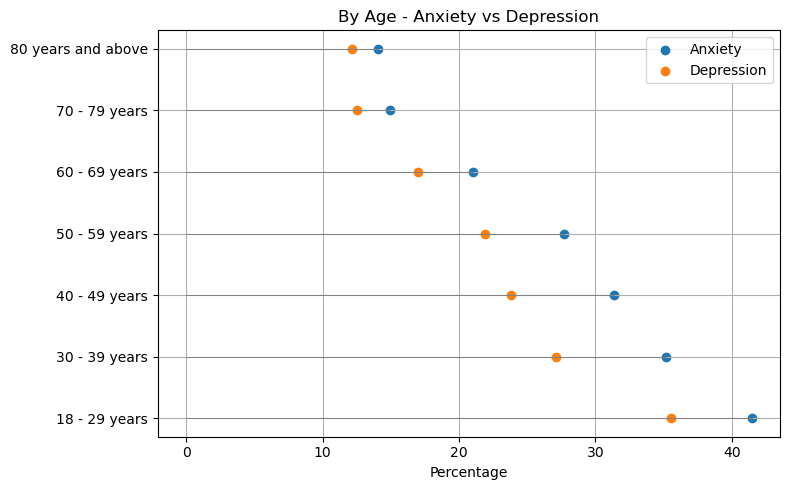

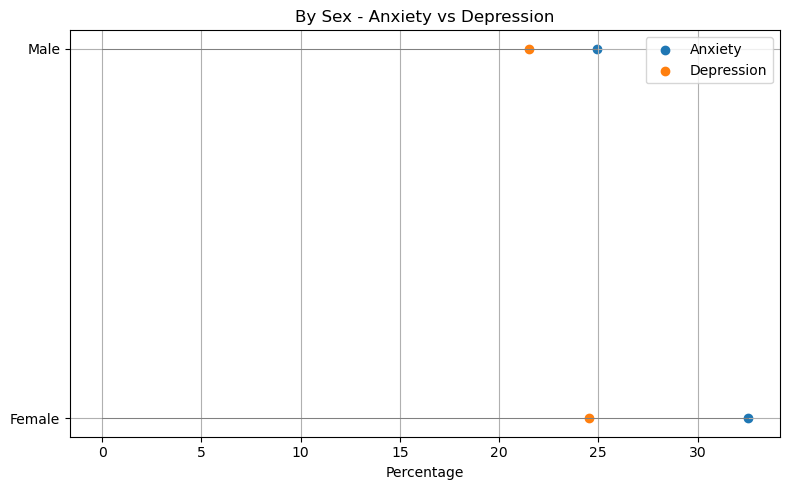

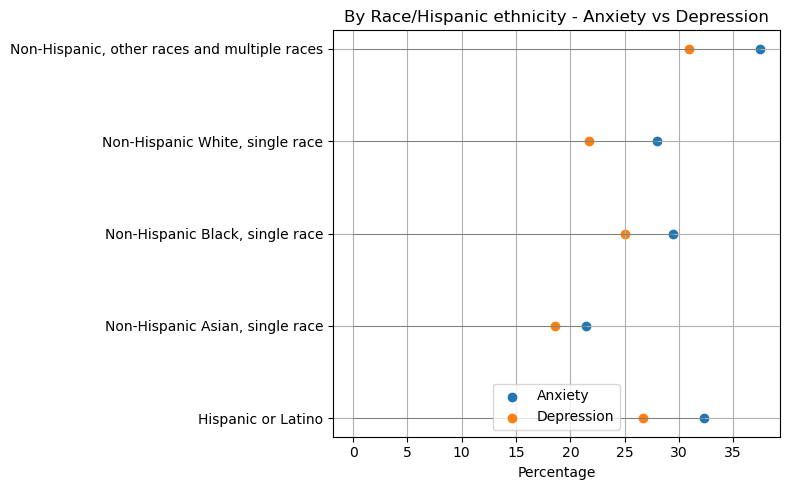

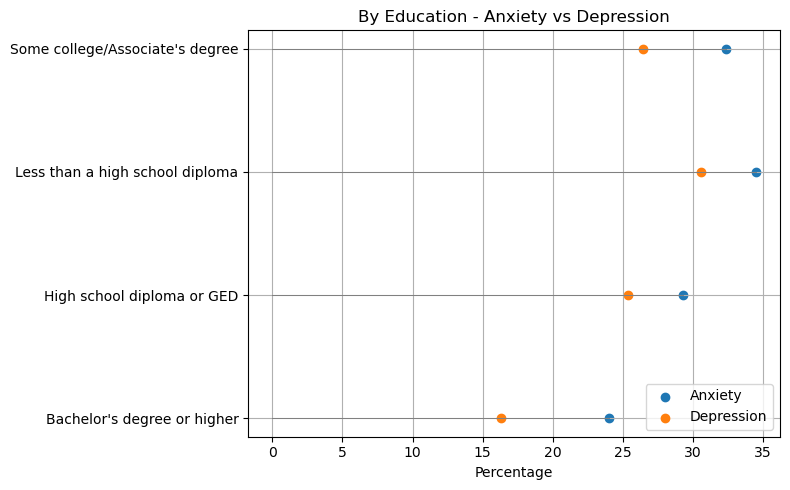

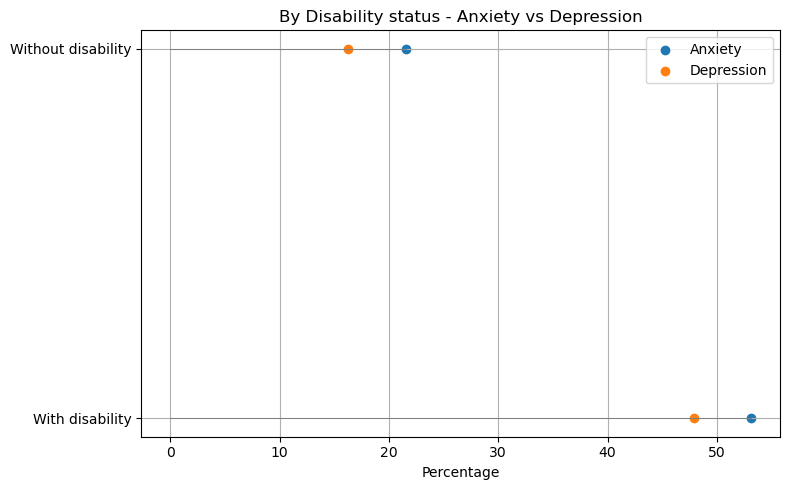

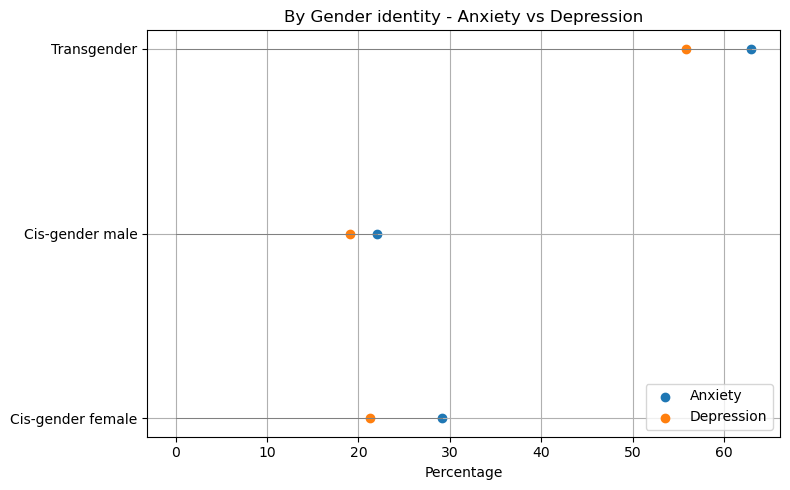

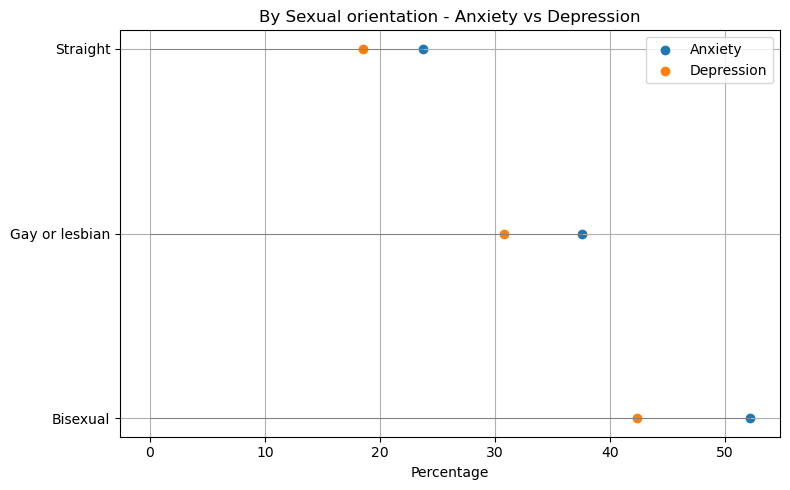

In [14]:
groups = global_indicator_filtered['Group'].unique()

for g in groups:
    df_group = global_indicator_filtered[global_indicator_filtered['Group'] == g]
    
    # Keep only relevant indicators
    df_group = df_group[df_group['Indicator'].isin([
        'Anxiety',
        'Depression'
    ])]
    
    # Aggregate by subgroup and indicator
    df_group = df_group.groupby(['Subgroup', 'Indicator'], as_index=False)['Value'].mean()
    
    # Pivot to wide format for plotting
    pivot_df = df_group.pivot(index='Subgroup', columns='Indicator', values='Value')
    
    plt.figure(figsize=(8,5))
    
    for i, indicator in enumerate(pivot_df.columns):
        plt.scatter(pivot_df[indicator], pivot_df.index, label=indicator)
        for y, x in enumerate(pivot_df[indicator]):
            plt.plot([0, x], [y, y], color='gray', linewidth=0.7)
    
    plt.xlabel('Percentage')
    plt.title(f'{g} - Anxiety vs Depression')
    plt.legend()
    plt.tight_layout()
    plt.grid(True)
    plt.show()


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
global_indicator_filtered = global_indicator_filtered.dropna()

In [16]:
categorical_columns = ['Group', 'Subgroup', 'Phase']

In [17]:
# LOGISTIC REGRESSION TO PREDICT WHICH INDIVIDUALS ARE MORE PRONE TO ANXIETY/DEPRESSION

encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(global_indicator_filtered[categorical_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))
X = pd.concat([one_hot_df, global_indicator_filtered[['Value']].reset_index(drop=True)], axis=1)

In [18]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = global_indicator_filtered['Indicator']

In [19]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=50)

In [20]:
clf = LogisticRegression(max_iter=2000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [21]:
# Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.84
                    precision    recall  f1-score   support

           Anxiety       0.77      0.76      0.77       308
Anxiety/Depression       0.86      0.87      0.87       309
        Depression       0.89      0.89      0.89       308

          accuracy                           0.84       925
         macro avg       0.84      0.84      0.84       925
      weighted avg       0.84      0.84      0.84       925



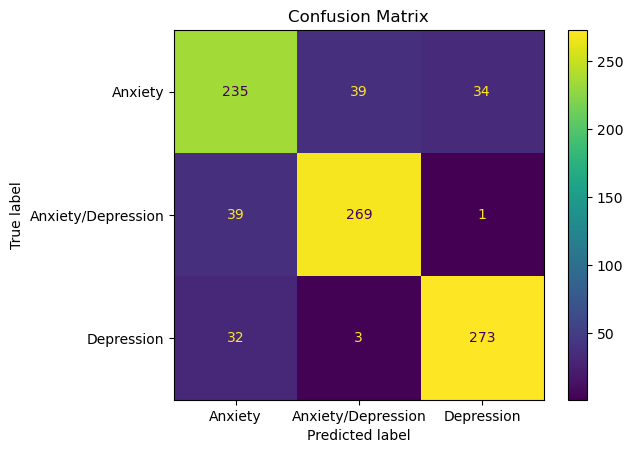

In [22]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix")
plt.show()

In [23]:
# Importing the second dataset (spread across multiple sheets with inconsistent formatting

# Prevalence.2: Australian citizens who were ever reported with a mental health condition
df = pd.read_excel(
    "Prevalence-and-impact-of-mental-illness.xlsx",
    sheet_name="Prevalence.2",
    skiprows=4,    # Skip first 4 rows
    nrows=133,
    header = 0# Load only 50 rows
)

# Prevalence.3: Propotions of Australians who reported having mental health by comorid long term health conditions
df1 = pd.read_excel(
    "Prevalence-and-impact-of-mental-illness.xlsx",
    sheet_name="Prevalence.3",
    skiprows=4,    # Skip first 4 rows
    nrows=13,
    header = 0       # Load only 50 rows
)
# 4 - 580, mental health condition by sex and statistical area (count)
# Prevalence.5: number and propotion by sex, Primary health network
df2 = pd.read_excel(
    "Prevalence-and-impact-of-mental-illness.xlsx",
    sheet_name="Prevalence.5",
    skiprows=4,    # Skip first 4 rows
    nrows=187,
    header = 0       # Load only 50 rows
)
# Prevalence.6: long term mental health condition
df3 = pd.read_excel(
    "Prevalence-and-impact-of-mental-illness.xlsx",
    sheet_name="Prevalence.6",
    skiprows=4,    # Skip first 4 rows
    nrows=1711,
    header = 0       # Load only 50 rows
)

# PRevalence 7: sex, age group, 2009,13,17,20,21
df4 = pd.read_excel(
    "Prevalence-and-impact-of-mental-illness.xlsx",
    sheet_name="Prevalence.7",
    skiprows = 4,
    nrows = 451,
    header = 0
)

#8 Physical health condition
df5 = pd.read_excel(
    "Prevalence-and-impact-of-mental-illness.xlsx",
    sheet_name="Prevalence.8",
    skiprows = 4,
    nrows = 1489,
    header = 0
)

#9 Average mental health score based on sex, age group
df6 = pd.read_excel(
    "Prevalence-and-impact-of-mental-illness.xlsx",
    sheet_name="Prevalence.9",
    skiprows = 4,
    nrows = 253,
    header = 0
)

In [24]:
df.head()

,Response,Age group,Sex,Count,NSW,Vic,QLD,WA,SA,Tas,ACT,NT,Australia
0,Has a mental health condition (including depre...,0–9 years,Male,Number,5471.0,4275,4751,1701,1094,460,363,112,18219.0
1,Has a mental health condition (including depre...,0–9 years,Female,Number,3131.0,2790,3083,1028,729,332,241,69,11405.0
2,Has a mental health condition (including depre...,0–9 years,Total,Number,8601.0,7063,7832,2726,1821,789,606,178,29622.0
3,Has a mental health condition (including depre...,10–19 years,Male,Number,24987.0,19494,20642,8486,5305,2427,1897,462,83689.0
4,Has a mental health condition (including depre...,10–19 years,Female,Number,36399.0,29682,28245,12605,8485,3458,2925,595,122402.0


In [27]:
df3.head()

,Year,Sex,Age group,Response,Per cent,Lower 95% confidence limit,Upper 95% confidence limit
0,2003,Male,15–17,Has a long-term mental health condition,0.01,0.01,0.04
1,2003,Male,15–17,Does not have a long-term mental health condition,0.11,0.07,0.16
2,2003,Male,15–17,Not stated,0.88,0.82,0.92
3,2003,Male,18–24,Has a long-term mental health condition,0.02,0.01,0.04
4,2003,Male,18–24,Does not have a long-term mental health condition,0.09,0.07,0.13


In [38]:
df3.tail()

,Year,Sex,Age group,Response,Per cent,Lower 95% confidence limit,Upper 95% confidence limit
1705,2021,Total,85 and over,Does not have a long-term mental health condition,0.68,0.60,0.75
1706,2021,Total,85 and over,Not stated,0.28,0.22,0.36
1707,2021,Total,Total,Has a long-term mental health condition,0.06,0.06,0.07
1708,2021,Total,Total,Does not have a long-term mental health condition,0.24,0.23,0.25
1709,2021,Total,Total,Not stated,0.70,0.68,0.71


In [39]:
df3.describe()

,Year,Per cent,Lower 95% confidence limit,Upper 95% confidence limit
count,1710.000000,1710.000000,1710.000000,1710.000000
mean,2012.000000,0.333257,0.302439,0.368041
std,5.478828,0.305412,0.295165,0.309924
min,2003.000000,0.000000,0.000000,0.020000
25%,2007.000000,0.060000,0.040000,0.080000
50%,2012.000000,0.220000,0.180000,0.240000
75%,2017.000000,0.620000,0.560000,0.660000
max,2021.000000,0.920000,0.900000,0.940000


In [41]:
df3.shape

(1710, 7)

In [45]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1710 entries, 0 to 1709
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        1710 non-null   int64  
 1   Sex                         1710 non-null   object 
 2   Age group                   1710 non-null   object 
 3   Response                    1710 non-null   object 
 4   Per cent                    1710 non-null   float64
 5   Lower 95% confidence limit  1710 non-null   float64
 6   Upper 95% confidence limit  1710 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 93.6+ KB


In [43]:
#Checking for null values
df3.isnull().sum()

Year                          0
Sex                           0
Age group                     0
Response                      0
Per cent                      0
Lower 95% confidence limit    0
Upper 95% confidence limit    0
dtype: int64

In [52]:
for i in ['Sex','Age group', 'Response']:
    print(df3[i].unique())

['Male' 'Female']
['15–17' '18–24' '25–34' '35–44' '45–54' '55–64' '65–74' '75–84'
 '85 and over' 'Total']
['Has a long-term mental health condition'
 'Does not have a long-term mental health condition' 'Not stated']


In [50]:
df3 = df3[df3['Sex'] != 'Total']

In [53]:
df3 = df3[df3['Response'] != 'Not stated']

In [55]:
df3 = df3[df3['Age group'] != 'Total']

In [54]:
df3.head()

,Year,Sex,Age group,Response,Per cent,Lower 95% confidence limit,Upper 95% confidence limit
0,2003,Male,15–17,Has a long-term mental health condition,0.01,0.01,0.04
1,2003,Male,15–17,Does not have a long-term mental health condition,0.11,0.07,0.16
3,2003,Male,18–24,Has a long-term mental health condition,0.02,0.01,0.04
4,2003,Male,18–24,Does not have a long-term mental health condition,0.09,0.07,0.13
6,2003,Male,25–34,Has a long-term mental health condition,0.02,0.01,0.03


In [ ]:
# Line graph for 
#Trend over time (line plot), X-axis: Year, Y-axis: Population (%) or raw numbers (depending on what’s in your data), Hue: Mental health condition status, This shows how the prevalence has changed over years.,Age group vs Mental health condition (grouped bar plot),X-axis: Age group,Y-axis: Population (%),Hue: Has mental health condition / Does not have,This shows which age groups are more affected.

In [56]:
age = ['15–17', '18–24' ,'25–34', '35–44', '45–54', '55–64', '65–74', '75–84','85 and over']

In [ ]:
df3['Year'] = pd.to_numeric(df3['Year'], errors='coerce')

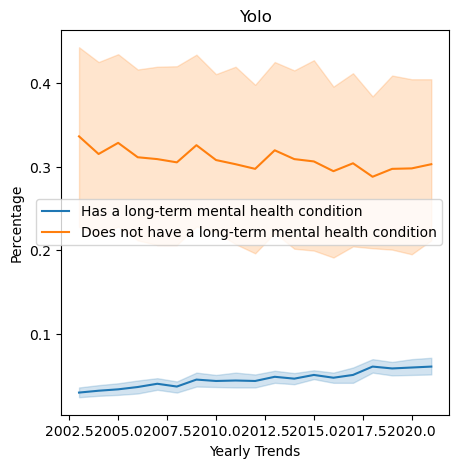

In [59]:
plt.figure(figsize = (5,5))
sns.lineplot(data=df3, x = 'Year', y = 'Per cent', hue = 'Response')
plt.legend()
plt.title('Yolo')
plt.xlabel('Yearly Trends')
plt.ylabel('Percentage')
plt.show()